develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.


#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

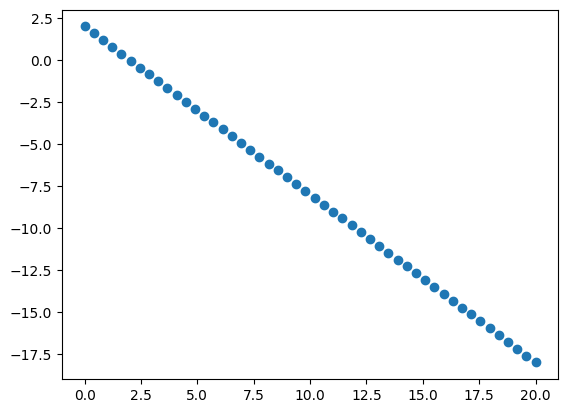

In [6]:
plt.scatter (X,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)


In [53]:

def adagrad(X, y, alpha, max_iterations, stop=0.001, convergence=0.001, epsilon =  1e-08):
    theta0 = 0
    theta1 = 0
    i = 0
    cost= []
    theta0_values = []
    theta1_values = []
    vt0=0.0
    vt1=0.0

    while i < max_iterations:
        
  
        h_x = theta0 + theta1 * X
        error = h_x - y
        mse = 1/(2*len(X)) * np.sum(error**2)
        cost.append(mse)
        theta0_values.append(theta0)
        theta1_values.append(theta1)
        gtheta0 = (1/len(X)) * np.sum(error)
        gtheta1 = (1/len(X)) * np.sum(error * X)
        

        
        if np.linalg.norm(np.array([gtheta0, gtheta1])) < stop:
            print("Gradient descent has converged using (stop criteria).")
            print(f"stop in itreration {i} ")

        
            break

        if len(cost) > 1 and abs(cost[-2] - cost[-1]) < convergence:
            print("Converged based on (stop criteria)")
            print(f"stop in itreration {i+1} ")
            print("j=\n", mse)
            
            
            break
        vt0=vt0+(gtheta0**2)
        vt1=vt1+(gtheta1**2)


        theta0 = theta0 - alpha/(np.sqrt(vt0)+epsilon) * gtheta0
        theta1 = theta1 - (alpha/(np.sqrt(vt1)+epsilon)) * gtheta1



        print(f"****************** Iteration {i} ********************\n")
        print(f"h(x):{h_x}\n")
        print()
        print(f"error vector :\n{error}\n")
        print("j=\n", mse)
        print()
        print("Gradient Vector:/n", gtheta0, gtheta1)
        print()
        print("norm of gradint",np.linalg.norm(np.array([gtheta0, gtheta1])))
        print()
        print("theta0\n", theta0)
        print()
        print("theta1\n", theta1)


        i += 1

    return {
        'theta0_values': theta0_values,
        'theta1_values': theta1_values,
        'cost': cost,
        'optimum0': theta0,
        'optimum1': theta1
    }




##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [54]:
res=adagrad(X, y, 0.05, 500, stop=0.001, convergence=0.001, epsilon=1e-08)
#single_variable_Adagrad(X,y,0.05, 1e-08,500) 

****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


error vector :
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j=
 49.34693877551021

Gradient Vector:/n 8.0 114.69387755102042

norm of gradint 114.97254258164628

theta0
 -0.0499999999375

theta1
 -0.04999999999564057
****

In [38]:
from sklearn.metrics import r2_score    
r2_score(y, res['optimum0'] + res['optimum1'] * X)

0.9484638125790851

In [39]:
def plotdata(res,col="blue"):

    plt.plot(res['cost'],marker='o',color=col)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.title('cost per iteration')
    plt.show()

    plt.plot(res['theta0_values'],res['cost'],marker='o',color=col)
    plt.xlabel('theta0')
    plt.ylabel('cost')
    plt.title('cost per theta0')
    plt.show()

    plt.plot(res['theta1_values'],res['cost'],marker='o',color=col)
    plt.xlabel('theta1')
    plt.ylabel('cost')
    plt.title('cost per theta1')
    plt.show()

    plt.plot(X,y,'o',color= col)
    plt.plot(X,res['optimum0']+res['optimum1']*X,color='red') 
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('best fit line')
    plt.show()

    plt.plot(X,y,'o',color= col)
    for i in range(len(res['theta0_values'])):
        plt.plot(X,res['theta0_values'][i]+res['theta1_values'][i]*X,color='red')
    plt.xlabel('X')
    plt.ylabel('y')






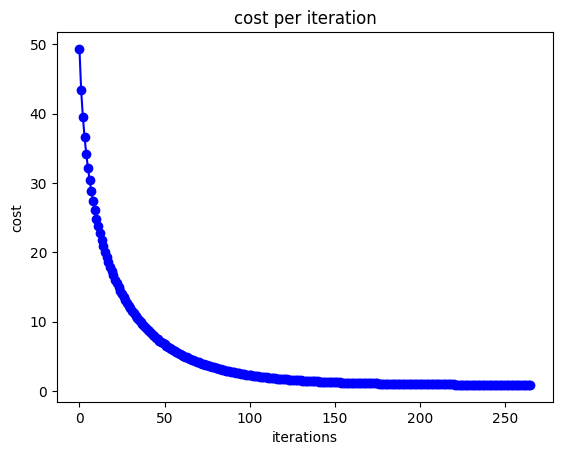

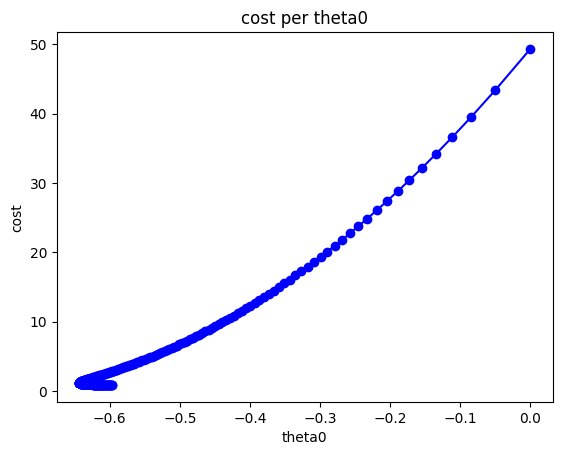

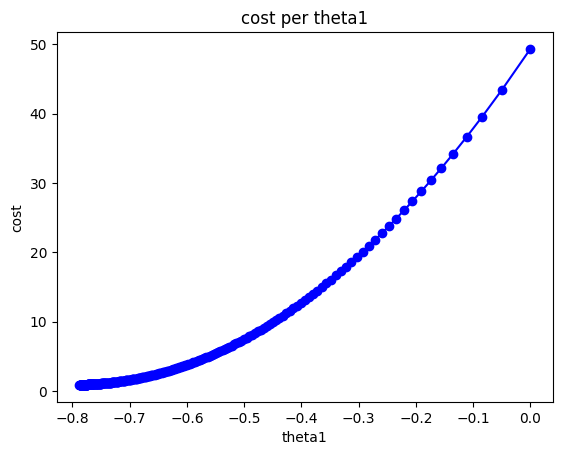

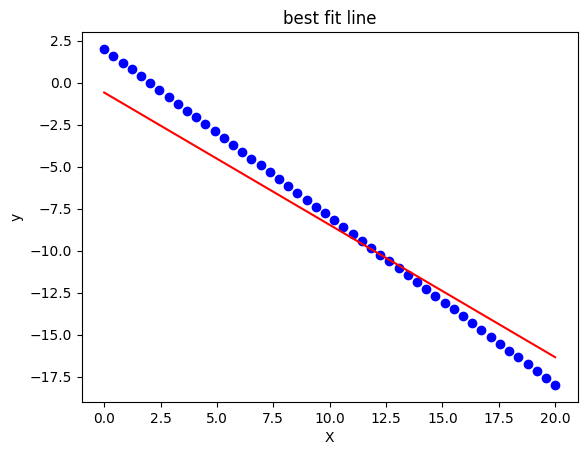

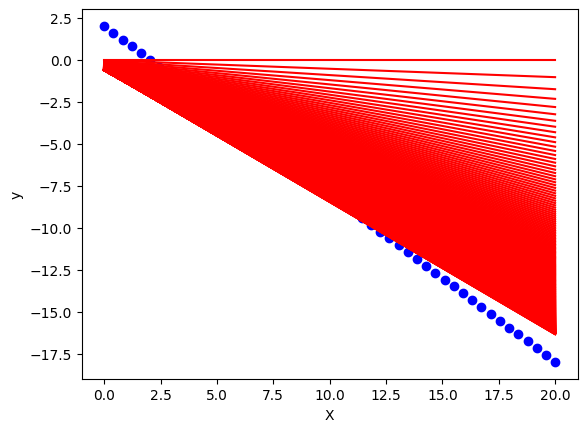

In [40]:
plotdata(res)

## RMSProp

### Update the previos implementation to be RMSProp.


In [68]:

def RMSProp(X, y, alpha, max_iterations, stop=0.001, convergence=0.001, epsilon =  1e-08, beta=0.9):
    theta0 = 0
    theta1 = 0
    cost= []
    theta0_values = []
    theta1_values = []
    vt0=0.0
    vt1=0.0

    for  i  in range(max_iterations):
        
  
        h_x = theta0 + theta1 * X
        error = h_x - y
        mse = 1/(2*len(X)) * np.sum(error**2)
        cost.append(mse)
        theta0_values.append(theta0)
        theta1_values.append(theta1)
        gtheta0 = (1/len(X)) * np.sum(error)
        gtheta1 = (1/len(X)) * np.sum(error * X)
        

        
        if np.linalg.norm(np.array([gtheta0, gtheta1])) < stop:
            print("Gradient descent has converged using (stop criteria).")
            print(f"stop in itreration {i} ")

        
            break

        if len(cost) > 1 and abs(cost[-2] - cost[-1]) < convergence:
            print("Converged based on (stop criteria)")
            print(f"stop in itreration {i} ")
            print("j=\n", mse)
            
            
            break
        vt0=beta*vt0+(1-beta)*(gtheta0**2)
        vt1=beta*vt1+(1-beta)*(gtheta1**2)


        theta0 = theta0 - alpha/(np.sqrt(vt0)+epsilon) * gtheta0
        theta1 = theta1 - (alpha/(np.sqrt(vt1)+epsilon)) * gtheta1



        print(f"****************** Iteration {i} ********************\n")
        print(f"h(x):{h_x}\n")
        print()
        print(f"error vector :\n{error}\n")
        print("j=\n", mse)
        print()
        print("Gradient Vector:/n", gtheta0, gtheta1)
        print()
        print("norm of gradint",np.linalg.norm(np.array([gtheta0, gtheta1])))
        print()
        print("theta0\n", theta0)
        print()
        print("theta1\n", theta1)



    return {
        'theta0_values': theta0_values,
        'theta1_values': theta1_values,
        'cost': cost,
        'optimum0': theta0,
        'optimum1': theta1
    }




##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [69]:
res=RMSProp(X, y, 0.05, 500, stop=0.001, convergence=0.001, epsilon=1e-08, beta=0.9)    

****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


error vector :
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j=
 49.34693877551021

Gradient Vector:/n 8.0 114.69387755102042

norm of gradint 114.97254258164628

theta0
 -0.158113882383419

theta1
 -0.1581138829648247
***

In [70]:
r2_score(y, res['optimum0'] + res['optimum1'] * X) 

0.9993602095484933

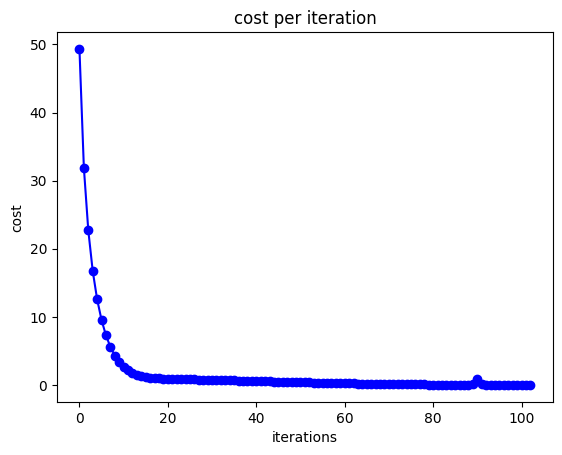

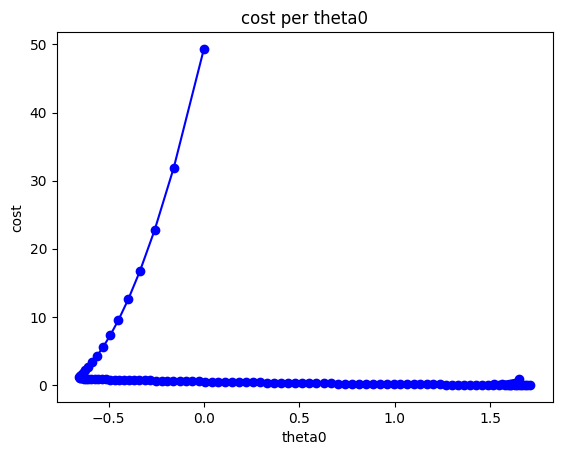

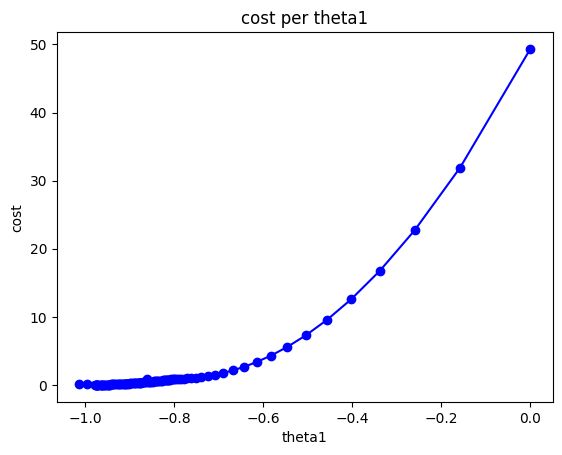

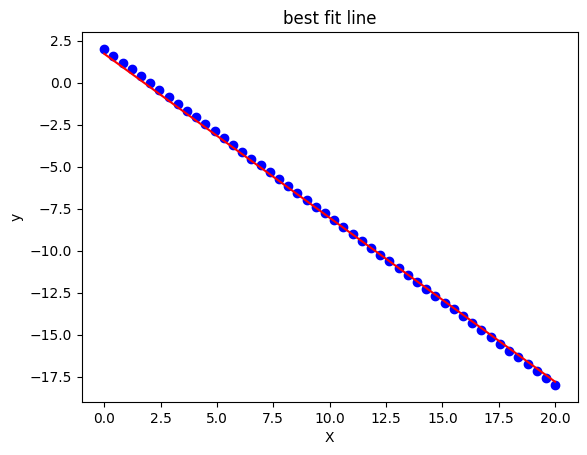

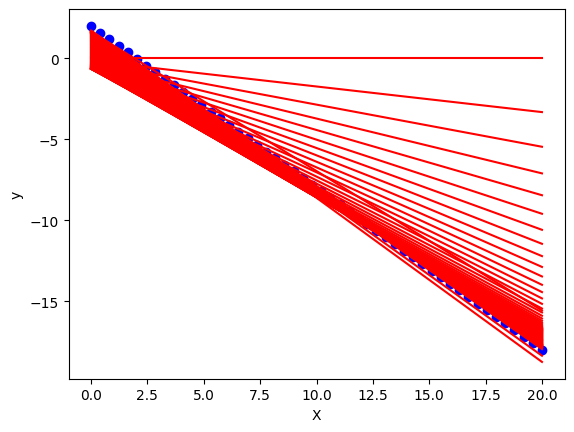

In [71]:
plotdata(res)

## Adam

### Update the previos implementation to be Adam.


In [84]:

def adam(X, y, alpha, max_iterations, stop=0.001, convergence=0.001, epsilon=1e-08, beta1=0.9, beta2=0.999):
    theta0 = 0
    theta1 = 0
    cost = []
    theta0_values = []
    theta1_values = []

    mt0 = 0.0
    mt1 = 0.0
    vt0 = 0.0
    vt1 = 0.0

    t = 0  

    for i in range(max_iterations):
        theta0_values.append(theta0)
        theta1_values.append(theta1)
        h_x = theta0 + theta1 * X
        error = h_x - y
        mse = 1 / (2 * len(X)) * np.sum(error ** 2)
        cost.append(mse)

        gtheta0 = (1 / len(X)) * np.sum(error)
        gtheta1 = (1 / len(X)) * np.sum(error * X)

        if np.linalg.norm(np.array([gtheta0, gtheta1])) < stop:
            print("Adam has converged using (stop criteria).")
            print(f"Stop in iteration {i} ")
            break

        if len(cost) > 1 and abs(cost[-2] - cost[-1]) < convergence:
            print("Converged based on (stop criteria)")
            print(f"Stop in iteration {i} ")
            print("j=\n", mse)
            break

        t += 1
        mt0 = beta1 * mt0 + (1 - beta1) * gtheta0
        mt1 = beta1 * mt1 + (1 - beta1) * gtheta1

        vt0 = beta2 * vt0 + (1 - beta2) * (gtheta0 ** 2)
        vt1 = beta2 * vt1 + (1 - beta2) * (gtheta1 ** 2)

        mt0_hat = mt0 / (1 - beta1 ** t)
        mt1_hat = mt1 / (1 - beta1 ** t)
        vt0_hat = vt0 / (1 - beta2 ** t)
        vt1_hat = vt1 / (1 - beta2 ** t)

        theta0 = theta0 - alpha / (np.sqrt(vt0_hat) + epsilon) * mt0_hat
        theta1 = theta1 - alpha / (np.sqrt(vt1_hat) + epsilon) * mt1_hat

        print(f"****************** Iteration {i} ********************\n")
        print(f"h(x):{h_x}\n")
        print()
        print(f"error vector :\n{error}\n")
        print("j=\n", mse)
        print()
        print("Gradient Vector:/n", gtheta0, gtheta1)
        print()
        print("norm of gradient", np.linalg.norm(np.array([gtheta0, gtheta1])))
        print()
        print("theta0\n", theta0)
        print()
        print("theta1\n", theta1)

    return {
        'theta0_values': theta0_values,
        'theta1_values': theta1_values,
        'cost': cost,
        'optimum0': theta0,
        'optimum1': theta1
    }


##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [86]:
res=adam(X, y, 0.05, 500, stop=0.001, convergence=0.001, epsilon=1e-08, beta1=0.2, beta2=0.7)

****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


error vector :
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j=
 49.34693877551021

Gradient Vector:/n 8.0 114.69387755102042

norm of gradient 114.97254258164628

theta0
 -0.0499999999375

theta1
 -0.04999999999564057
***

In [87]:
r2_score (y, res['optimum0'] + res['optimum1'] * X)

0.9989675218213928

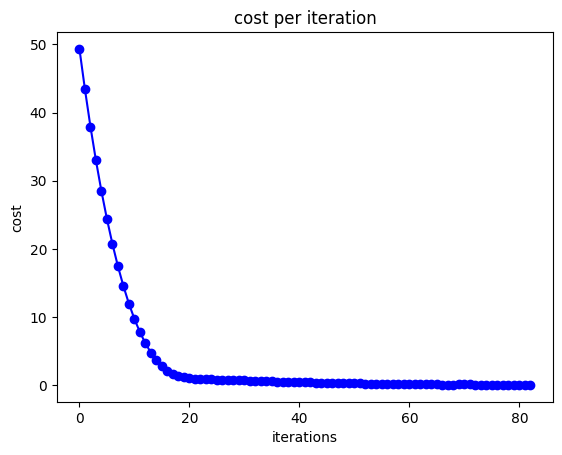

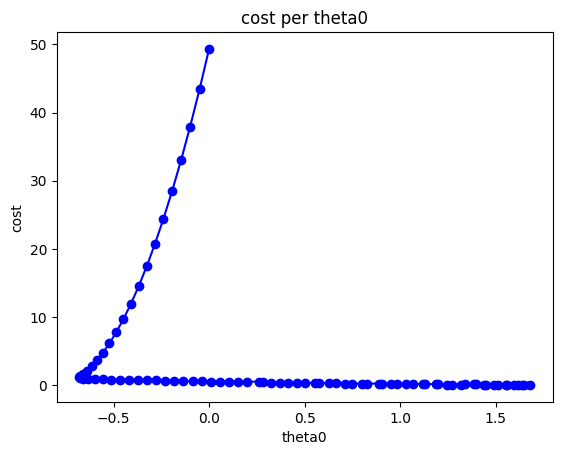

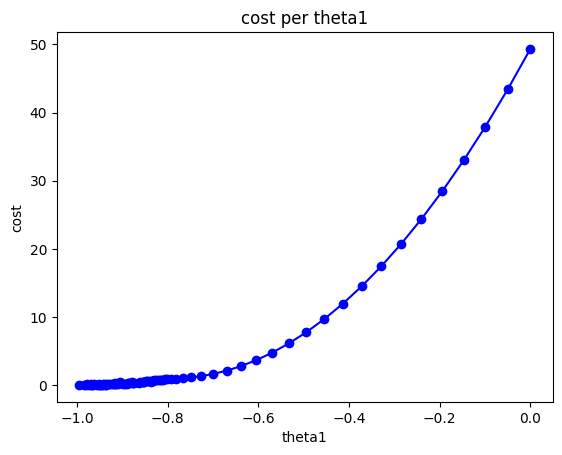

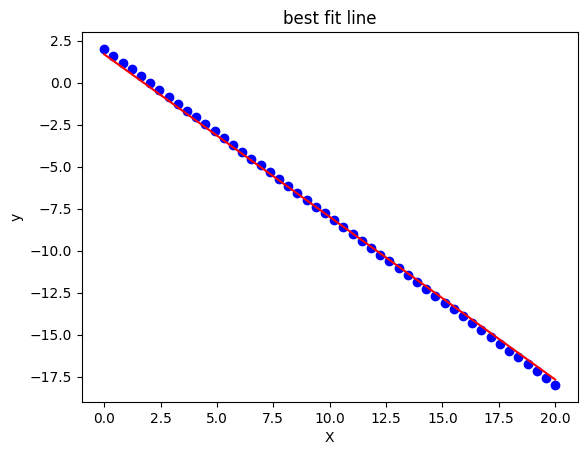

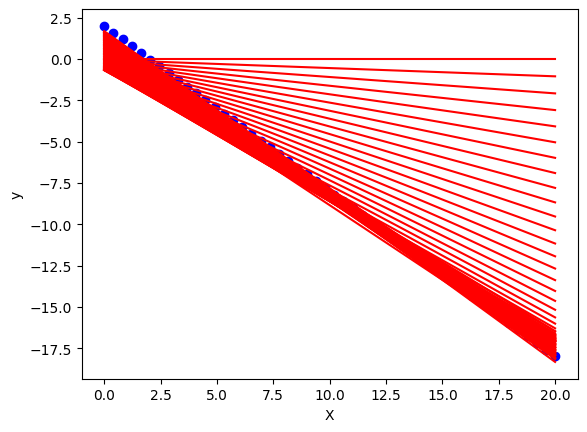

In [88]:
plotdata(res)   